In [8]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant= 0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, hypercube=False,  random_state=41, class_sep=10)

In [9]:
import matplotlib.pyplot as plt

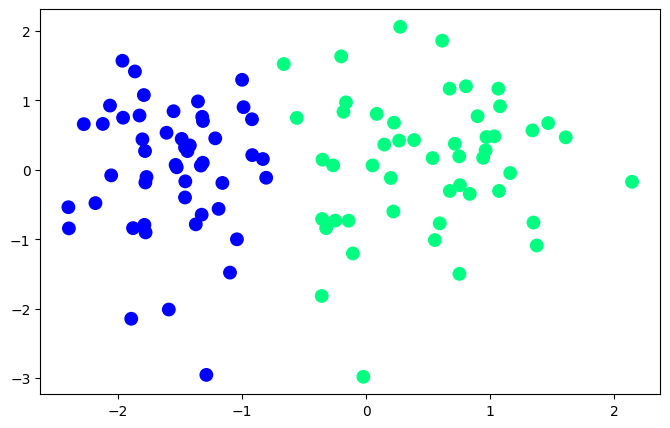

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=80)

In [11]:
def perceptron(x, y):
    x = np.insert(x, 0, 1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j], weights))
        weights = weights + lr * (y[j] - y_hat) * x[j]
        
    return weights[0],weights[1:]

In [12]:
def step(z):
    return 1 if z>0 else 0

In [13]:
intercept, coef = perceptron(X,y)

In [14]:
intercept

0.9

In [15]:
coef

array([1.31245604, 0.20070752])

y = mx+b

In [16]:
m = -(coef[0]/coef[1])
b = -(intercept/coef[1])

In [17]:
x_input = np.linspace(-3,3,100)
x_input
y_input = m * x_input + b

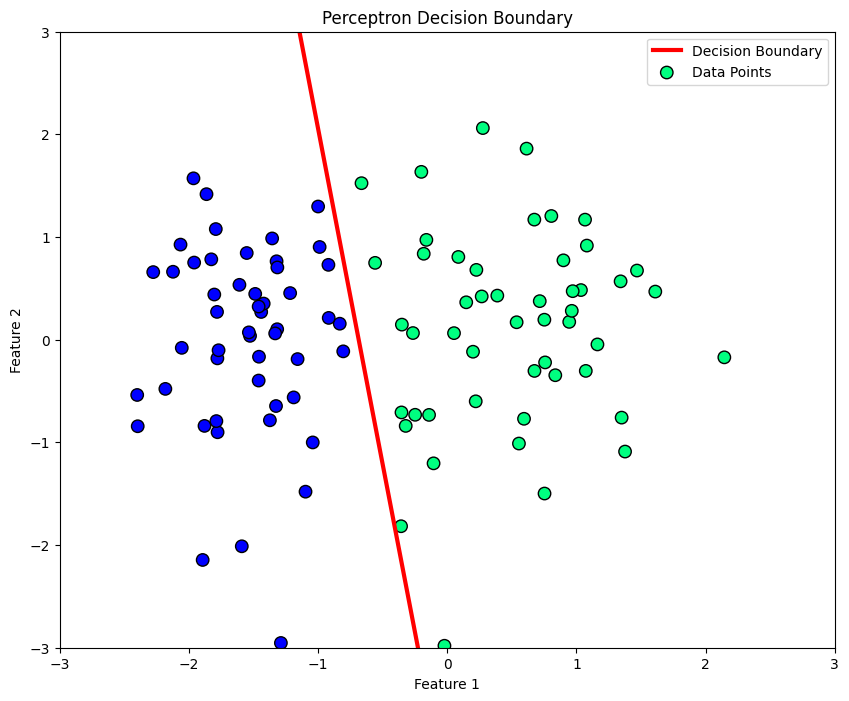

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(x_input, y_input, color='red', linewidth=3, label='Decision Boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolor='k', s=80, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()

# animation of the perceptron

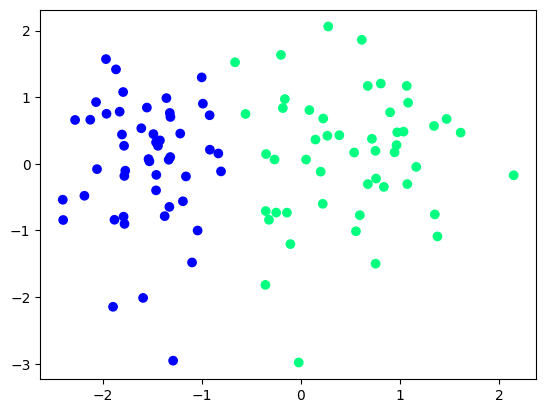

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=1, class_sep=10, hypercube=False, random_state=41)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')



## perceptron

In [20]:
def perceptron(x, y):
    m= []
    b= []
    
    x = np.insert(x, 0, 1, axis=1)
    weights = np.ones(x.shape[1])
    ln = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j], weights))
        weights = weights + ln * (y[j] - y_hat) * x[j]
        
        m.append(-(weights[1] / weights[2]))
        b.append(-(weights[0] / weights[2]))
    return m, b

In [21]:
def step(val):
    return 1 if val > 0 else 0

In [22]:
m, b = perceptron(X,y)

In [23]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


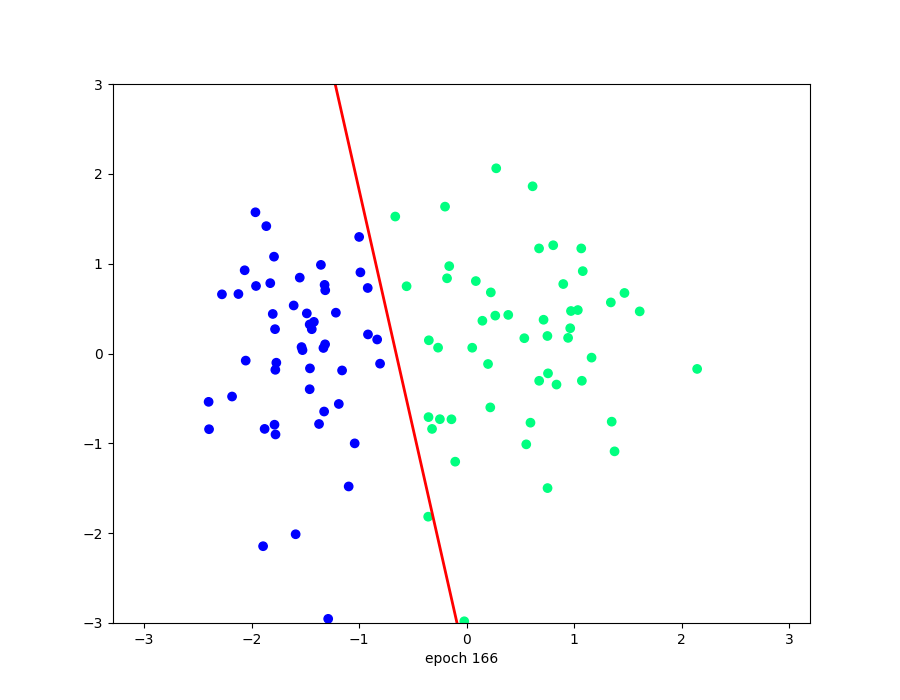

In [24]:
fig, ax = plt.subplots(figsize= (9,7))

x_i = np.arange(-3, 3, 0.1)
y_i = m[0] * x_i + b[0]

ax.scatter(X[:, 0], X[:, 1],c = y,  cmap='winter')
line, = ax.plot(x_i, y_i, 'r-', linewidth=2)
# line, = ax.plot(x_i, m[0] * x_i + b[0], 'r-', linewidth=2)
plt.ylim(-3, 3)

def update(i):
    label_ = f"epoch {i+1}"
    line.set_ydata(m[i] * x_i + b[i])
    ax.set_xlabel(label_)
    
anime = FuncAnimation(fig, update,repeat=True ,frames=200, interval=100)